# Code for Cleaning, Manipulating, and Predicting Car Sales

### Read in the csv file

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_full = pd.read_csv('train.csv')  	
train_full.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

### Look at inital data

In [52]:
print(train_full.head(n=10))
print(train_full.describe())

         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
2  45774419   8467     -        HONDA       FIT        2006  Hatchback   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   
6  45656768   1803   761       TOYOTA     Prius        2010  Hatchback   
7  45816158    549   751      HYUNDAI    Sonata        2013      Sedan   
8  45641395   1098   394       TOYOTA     Camry        2014      Sedan   
9  45756839  26657     -        LEXUS    RX 350        2007       Jeep   

  Leather interior Fuel type Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5   186005        6.0     Automatic   
1               No    Pet

### Check to see what attributes are missing values

In [ ]:
train_full.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

### Range of Years

Range of years: 1939 to 2020


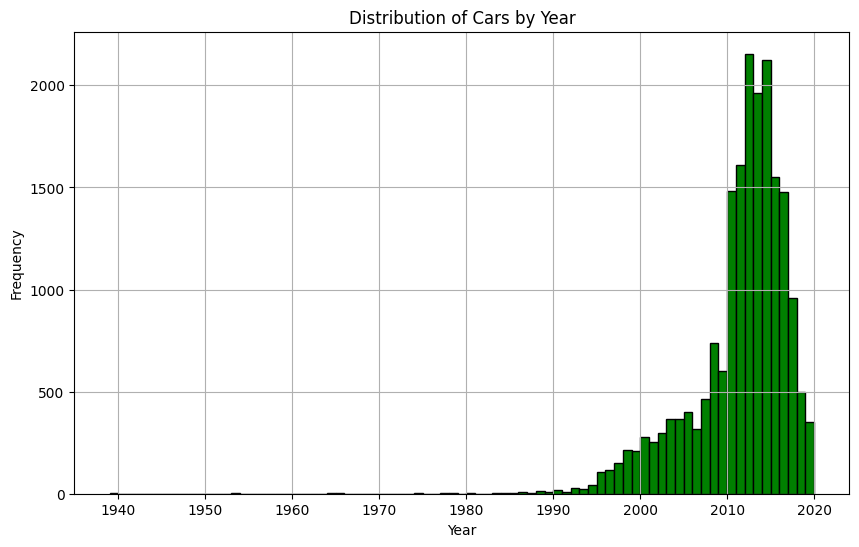

In [ ]:
min_year = train_full['Prod. year'].min()
max_year = train_full['Prod. year'].max()
print(f"Range of years: {min_year} to {max_year}")
plt.figure(figsize=(10, 6))
plt.hist(train_full['Prod. year'], bins=range(train_full['Prod. year'].min(), train_full['Prod. year'].max() + 1), color='green', edgecolor='black')
plt.title('Distribution of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Fuel Type Distribution

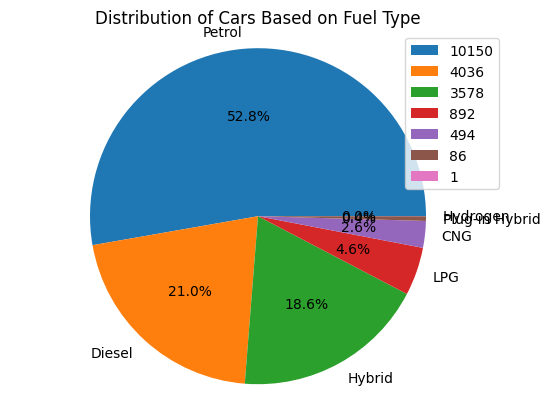

In [34]:
fuel_type_counts = train_full['Fuel type'].value_counts()

plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Cars Based on Fuel Type')
plt.legend(fuel_type_counts, loc='upper right')
plt.show()

### Average Price of Car by Year

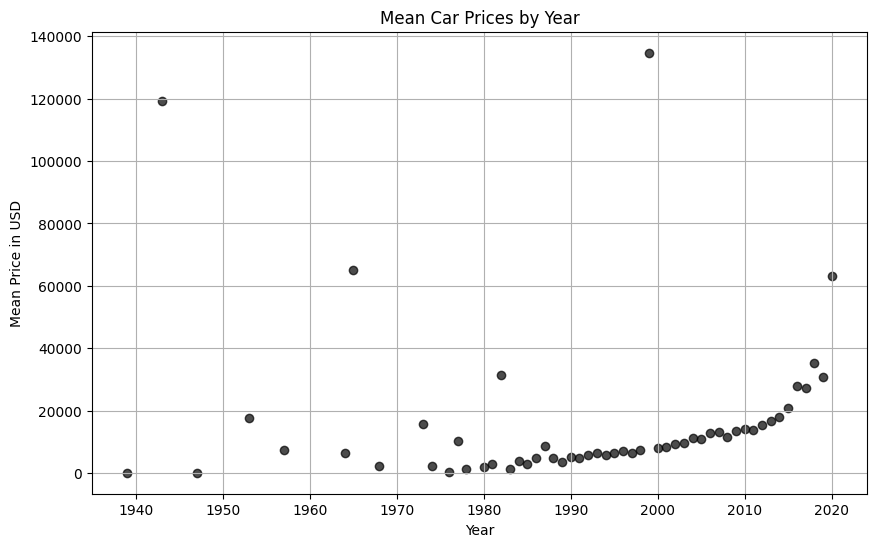

In [40]:
mean_prices = train_full.groupby('Prod. year')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(mean_prices['Prod. year'], mean_prices['Price'], color='black', alpha=0.7)
plt.title("Mean Car Prices by Year")
plt.xlabel("Year")
plt.ylabel("Mean Price in USD")
plt.grid(True)
plt.show()

### Convert String to Float of Mileage

In [48]:
train_full['Mileage'] = train_full['Mileage'].astype(str).str.replace(r'\D', '', regex=True)
train_full['Mileage'] = pd.to_numeric(train_full['Mileage'], errors='coerce').fillna(0).astype(int)


### Relationship Between Selling Price and Mileage with Gear Box Type

Correlation between Selling Price and Mileage: -0.0017583793718207335


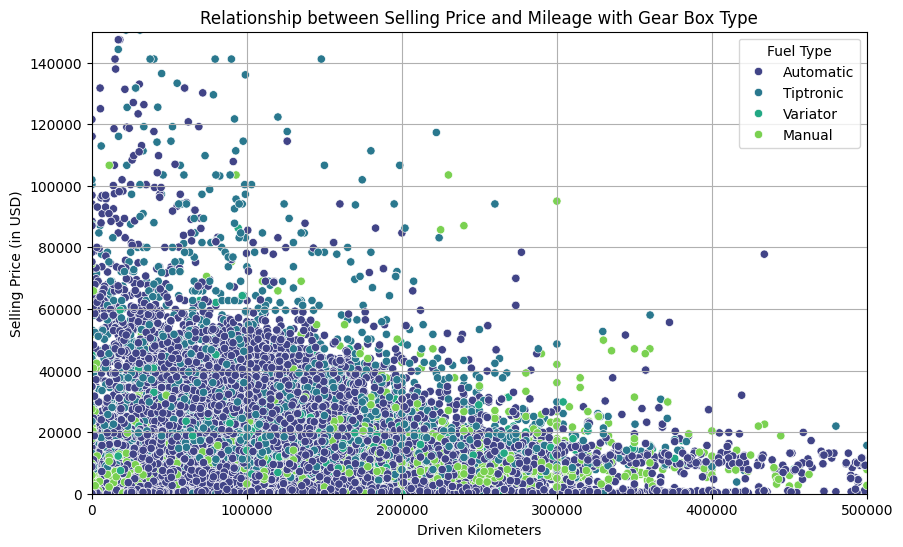

In [100]:
price_mileage_corr = train_full['Price'].corr(train_full['Mileage'])
print("Correlation between Selling Price and Mileage:", price_mileage_corr)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Mileage", y="Price", data=train_full, hue="Gear box type", palette="viridis")
plt.title("Relationship between Selling Price and Mileage with Gear Box Type")
plt.xlim(0, 500000)
plt.ylim(0, 150000)
plt.xlabel("Driven Kilometers")
plt.ylabel("Selling Price (in USD)")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()

### Relationship between Number of Cylinders and Price

Correlation between Selling Price and years: 0.00751802258755772


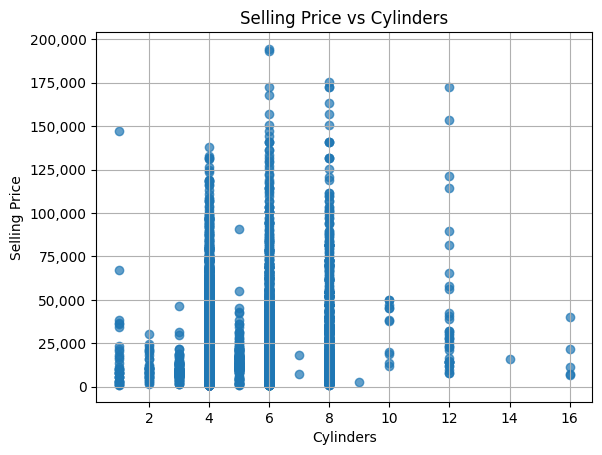

In [77]:
cylinder_price_corr = train_full['Price'].corr(train_full['Cylinders'])
filtered_data = train_full[(train_full['Price'] >= 1000) & (train_full['Price'] <= 200000)]

print("Correlation between Selling Price and years:", cylinder_price_corr)
plt.scatter(filtered_data['Cylinders'], filtered_data['Price'], alpha=0.7)
plt.title('Selling Price vs Cylinders')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
plt.xlabel('Cylinders')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

### Top 15 Models Sold

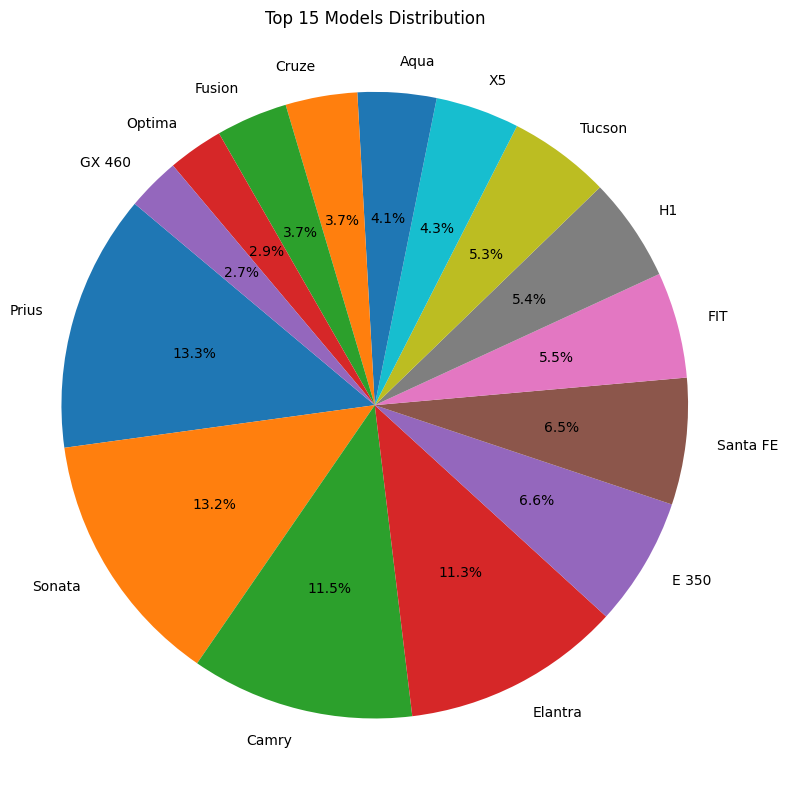

In [101]:
model_counts = train_full['Model'].value_counts()
top_15_models = model_counts.head(15)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_15_models, labels=top_15_models.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Models Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()

### Top 10 Manufactures

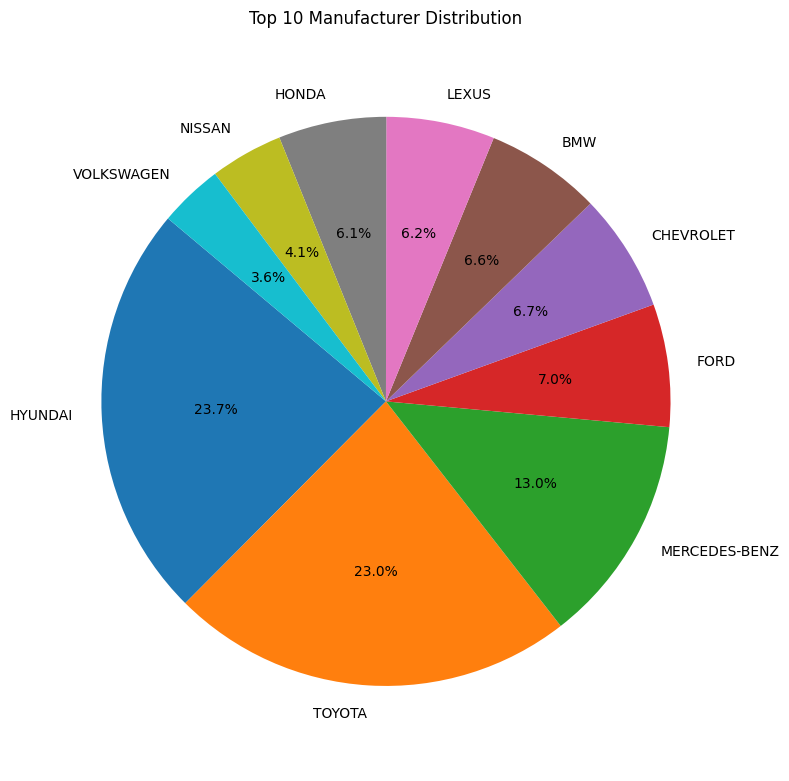

In [102]:
manufacturer_counts = train_full['Manufacturer'].value_counts()
top_10_manufacturer = manufacturer_counts.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_manufacturer, labels=top_10_manufacturer.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Manufacturer Distribution')
plt.axis('equal')  
plt.tight_layout()
plt.show()